In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray
import math

from common import left, right, poly_degrees, build_poly

points_counts = [10, 20, 30, 50, 100]

x_tables = [np.linspace(left, right, points_count) for points_count in points_counts]
np.random.seed(123)
y_tables = [np.sin(x_tables[i]) + np.random.standard_normal(points_counts[i]) * 0.2 for i in range(len(points_counts))]

In [2]:
def interpolate_by_poly(x_table: ndarray, y_table: ndarray, poly_degree: int):
    points_count = len(x_table)

    phi = np.full([points_count, poly_degree + 1], None, dtype='float')
    phi[:, 0] = np.full(points_count, 1)
    for i in range(1, poly_degree + 1):
        phi[:, i] = phi[:, i - 1] * x_table

    matrix = phi.T.dot(phi)
    free_column = phi.T.dot(y_table)

    return np.linalg.solve(matrix, free_column)

In [3]:
polynomials = np.full([len(points_counts), len(poly_degrees)], None)
for i in range(len(points_counts)):
    for j in range(len(poly_degrees)):
        coefficients = interpolate_by_poly(x_tables[i], y_tables[i], poly_degrees[j])
        polynomials[i, j] = build_poly(coefficients)

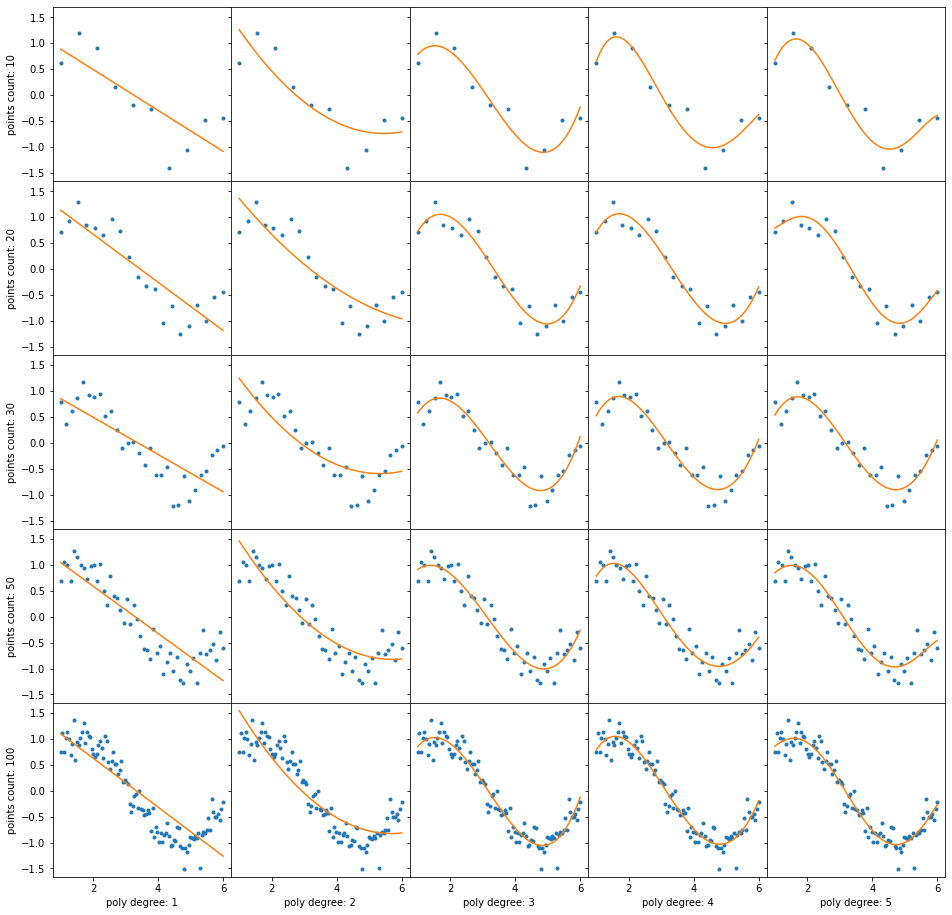

In [4]:
figure, axs = plt.subplots(len(points_counts), len(poly_degrees), figsize=(16, 16), sharex=True, sharey=True)
figure.subplots_adjust(wspace=0, hspace=0)
for i in range(len(points_counts)):
    for j in range(len(poly_degrees)):
        arg_table = np.linspace(left, right, 100)
        poly_table = polynomials[i, j](arg_table)
        axs[i, j].plot(x_tables[i], y_tables[i], '.', arg_table, poly_table)
for i in range(len(points_counts)):
    axs[i, 0].set_ylabel(f'points count: {points_counts[i]}')
for j in range(len(poly_degrees)):
    axs[-1, j].set_xlabel(f'poly degree: {poly_degrees[j]}')

In [5]:
deltas = np.full([len(points_counts), len(poly_degrees)], None, dtype='float')
for i in range(len(points_counts)):
    for j in range(len(poly_degrees)):
        p = polynomials[i, j]
        delta = math.sqrt(sum((p(x_tables[i]) - y_tables[i]) ** 2) / points_counts[i])
        deltas[i, j] = delta
deltas

array([[0.48090211, 0.42437872, 0.26382603, 0.2298347 , 0.22813095],
       [0.39211999, 0.37424703, 0.18959741, 0.18940599, 0.18292651],
       [0.41846331, 0.37039844, 0.20418211, 0.20265917, 0.20255673],
       [0.37948847, 0.3231791 , 0.22175937, 0.2155149 , 0.21376312],
       [0.39099992, 0.33293084, 0.18460576, 0.18287055, 0.18108121]])